# Exploratory Data Analysis

The main objectives of this notebook are: 
- Explore the dataset through univariate & multivariate analysis 
- Investigate distribution of data 
- Extract relevant insights to determine steps for feature engineering

In [1]:
import polars as pl
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
import os 
from collections import Counter

# Manually add path to read from another folder 
path2add = os.path.normpath(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir, "utils"))
)
if not (path2add in sys.path):
    sys.path.append(path2add)

from eda import *

In [35]:
df = pl.read_csv("../data/google_analytics_data.csv",ignore_errors=True)

In [36]:
df.head()

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
i64,i64,i64,str,str,str,str,str,str,str,str,str,str
20170320,1490013196,741694360311983889,"""Southern Europe""","""Spain""","""not available in demo dataset""","""Chrome""","""Windows""","""desktop""","""google""",null,"""YouTube Hard Cover Journal""","""Home/Shop by Brand/YouTube/"""
20170320,1490075224,751716124732042493,"""Northern America""","""United States""","""New York""","""Safari""","""iOS""","""mobile""","""google""",null,"""Google Alpine Style Backpack""","""Home/Bags/"""
20170320,1490069949,3875753008535006311,"""Northern America""","""United States""","""not available in demo dataset""","""Safari (in-app)""","""iOS""","""mobile""","""m.facebook.com""",null,"""YouTube Custom Decals""","""Home/Shop by Brand/YouTube/"""
20170320,1490030549,null,"""Southern Europe""","""Spain""","""Barcelona""","""Chrome""","""Macintosh""","""desktop""","""google""",null,"""Suitcase Organizer Cubes""","""Home/Bags/"""
20170210,1486780166,1321377067218362907,"""Northern America""","""United States""","""not available in demo dataset""","""Chrome""","""Android""","""mobile""","""google""",null,"""YouTube RFID Journal""","""Home/Shop by Brand/YouTube/"""


In [37]:
# Unique visitors 
print("Unique visitors:")
print(df.select(pl.col('fullVisitorId').n_unique()))

Unique visitors:
shape: (1, 1)
┌───────────────┐
│ fullVisitorId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 334653        │
└───────────────┘


In [38]:
# Total visits
# print("Total visits:")
# print(df.select(pl.col('visitNumber').sum()))

In [39]:
popular_country=print_popular_stats(df, "country")
popular_country

10 most popular country:


country,count
str,u32
"""United States""",11780505
"""Canada""",736535
"""India""",655660
"""United Kingdom""",523164
"""Japan""",314252
"""Germany""",297492
"""Taiwan""",245785
"""Australia""",242012
"""France""",232359


In [40]:
print_popular_stats(df, "city")

10 most popular city:


city,count
str,u32
"""not available in demo dataset""",9879575
"""Mountain View""",1479141
"""New York""",968011
"""San Francisco""",628853
"""Sunnyvale""",490439
"""(not set)""",423707
"""San Jose""",341132
"""Los Angeles""",275126
"""Chicago""",260783


In [41]:
print_popular_stats(df, "browser")

10 most popular browser:


browser,count
str,u32
"""Chrome""",14477516
"""Safari""",2703590
"""Firefox""",627776
"""Internet Explorer""",283209
"""Edge""",176256
"""Android Webview""",87302
"""Safari (in-app)""",73375
"""Opera""",58316
"""Opera Mini""",55111


In [42]:
popular_source = print_popular_stats(df, "source")
popular_source

10 most popular source:


source,count
str,u32
"""(direct)""",10059016
"""google""",6557611
"""youtube.com""",711481
"""Partners""",234185
"""dfa""",169749
"""analytics.google.com""",121845
"""google.com""",93326
"""sites.google.com""",78406
"""facebook.com""",64122


In [43]:
print_popular_stats(df, "operatingSystem")

10 most popular operatingSystem:


operatingSystem,count
str,u32
"""Macintosh""",6150927
"""Windows""",5788129
"""Android""",2389950
"""iOS""",2300795
"""Chrome OS""",979922
"""Linux""",937570
"""(not set)""",40733
"""Windows Phone""",13953
"""Samsung""",2646


In [44]:
# Total transactions 
print("Number of transactions: ",df.select(pl.col("transactionId").is_not_null().sum()))

Number of transactions:  shape: (1, 1)
┌───────────────┐
│ transactionId │
│ ---           │
│ u32           │
╞═══════════════╡
│ 74457         │
└───────────────┘


In [45]:
# Total transactions 
# print("Number of transactions: ",df_count['count'][-1])

# # Percent of transactions vs all other events 
# print("Percent of transactions:",round((df_count['count'][-1] / df_count['count'].sum())*100,3))

### Univariate Analysis 

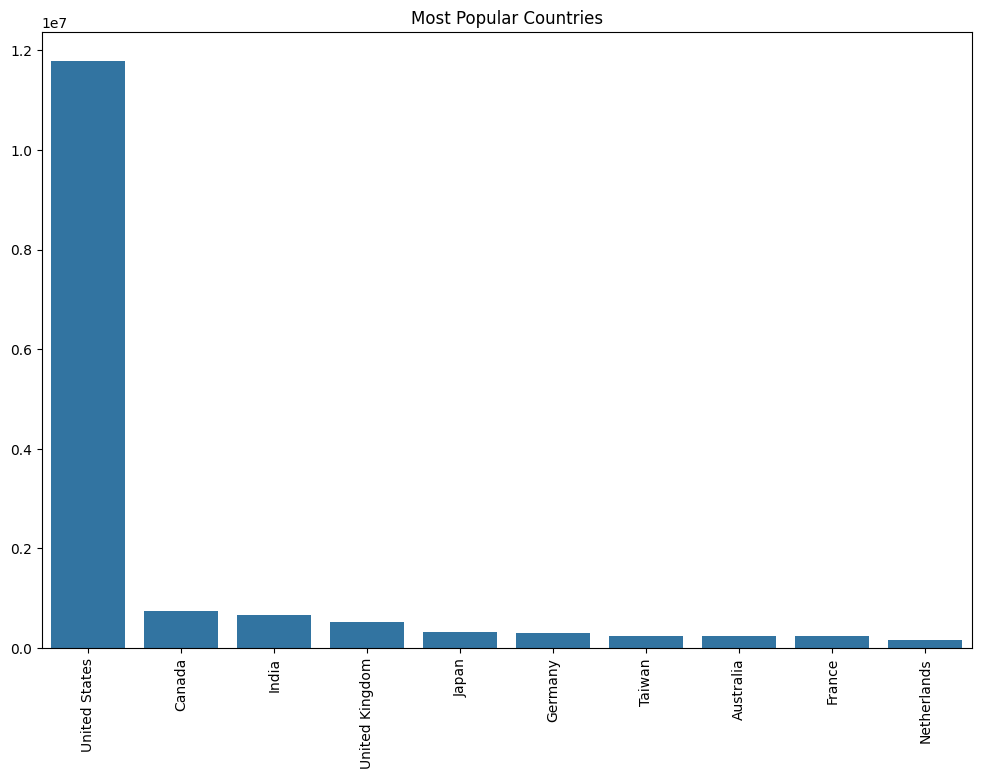

In [46]:
bar_plot(popular_country['country'].to_numpy(), popular_country['count'].to_numpy(),"Most Popular Countries")

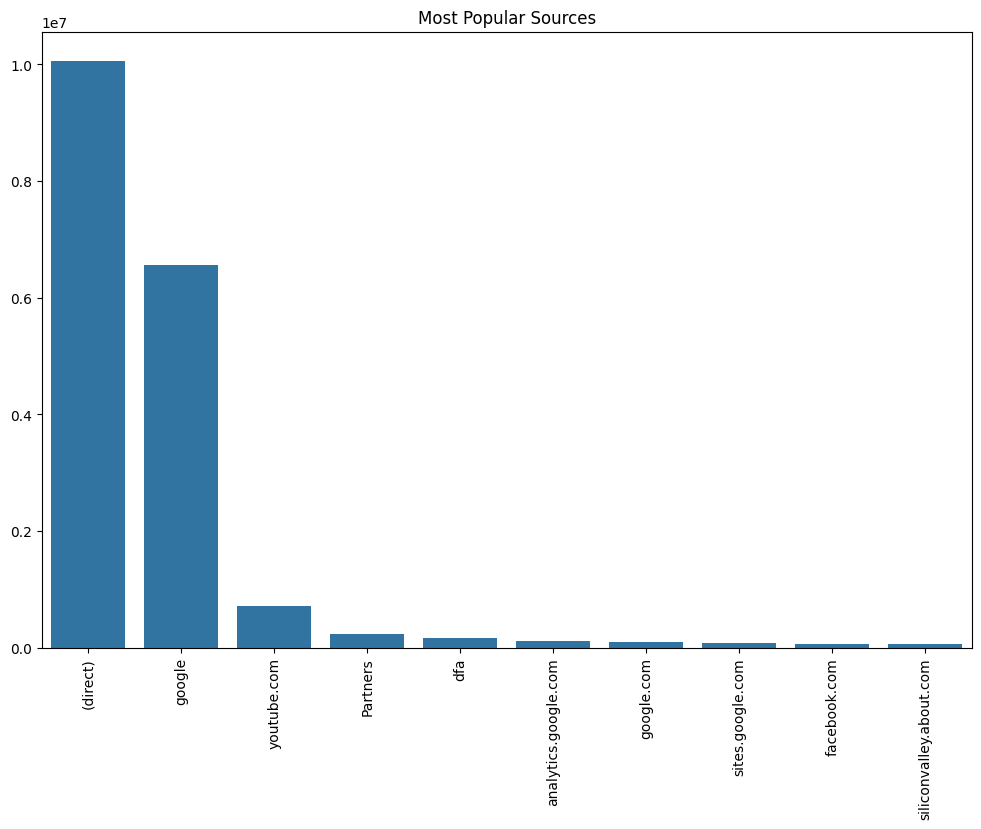

In [47]:
bar_plot(popular_source['source'].to_numpy(), popular_source['count'].to_numpy(),"Most Popular Sources")

### Multivariate Analysis 

In [48]:
grouped = df.group_by(pl.col('country')).agg(pl.col('v2ProductName'))
grouped

country,v2ProductName
str,list[str]
"""Hong Kong""","[""24 oz YouTube Sergeant Stripe Bottle"", ""Google Snapback Hat Black"", … ""Google Men's Zip Hoodie""]"
"""Congo - Kinshasa""","[""Ballpoint Stylus Pen"", ""Clip-on Compact Charger"", … ""YouTube Hard Cover Journal""]"
"""Lebanon""","[""Google 2200mAh Micro Charger"", ""22 oz YouTube Bottle Infuser"", … ""You Tube Toddler Short Sleeve Tee Red""]"
"""Bulgaria""","[""YouTube Men's Short Sleeve Hero Tee Black"", ""23 oz Wide Mouth Sport Bottle"", … ""22 oz YouTube Bottle Infuser""]"
"""Sudan""","[""YouTube Men's Short Sleeve Hero Tee Charcoal"", ""Android Heavyweight Long Sleeve Badge Tee Black"", … ""Google Leather Journal""]"
…,…
"""Bermuda""","[""Rocket Flashlight"", ""Clip-on Compact Charger"", … ""Android Wool Heather Cap Heather/Black""]"
"""Israel""","[""Google Men's Lightweight Microfleece Jacket Black"", ""Google Men's 100% Cotton Short Sleeve Hero Tee Navy"", … ""Android 17oz Stainless Steel Sport Bottle""]"
"""United States""","[""Google Alpine Style Backpack"", ""YouTube Custom Decals"", … ""Mistral Rucksack""]"


In [49]:
usa_purchases = df.filter((pl.col('country') == 'United States') & (pl.col('transactionId') != 'null'))
usa_purchases

date,visitStartTime,fullVisitorId,subContinent,country,city,browser,operatingSystem,deviceCategory,source,transactionId,v2ProductName,v2ProductCategory
i64,i64,i64,str,str,str,str,str,str,str,str,str,str
20170226,1488137668,5149788969578895545,"""Northern America""","""United States""","""Mountain View""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201702261432""","""Google Doodle Decal""","""${productitem.product.origCatN…"
20170216,1487267605,2517364798811740879,"""Northern America""","""United States""","""not available in demo dataset""","""Chrome""","""Windows""","""desktop""","""(direct)""","""ORD201702162343""","""Google Men's Lightweight Micro…","""Apparel"""
20170730,1501437710,4981679382824177253,"""Northern America""","""United States""","""San Francisco""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201707301706""","""Google Power Bank""","""Electronics"""
20170605,1496692659,5696607948314871944,"""Northern America""","""United States""","""not available in demo dataset""","""Chrome""","""Macintosh""","""desktop""","""chat.google.com""","""ORD201706052682""","""Android Men's Outerstellar Sho…","""Apparel"""
20170301,1488405261,939859150591422942,"""Northern America""","""United States""","""Ann Arbor""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201703012193""","""Google Toddler Short Sleeve Te…","""Apparel"""
…,…,…,…,…,…,…,…,…,…,…,…,…
20170320,1490020912,6986536761307654836,"""Northern America""","""United States""","""not available in demo dataset""","""Safari""","""Macintosh""","""desktop""","""google""","""ORD201703202206""","""Four Color Retractable Pen""","""Office"""
20161220,1482296712,869668043543534560,"""Northern America""","""United States""","""New York""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201612202885""","""YouTube Twill Cap""","""Apparel"""
20161220,1482264201,null,"""Northern America""","""United States""","""Chicago""","""Chrome""","""Macintosh""","""desktop""","""(direct)""","""ORD201612203145""","""Google Spiral Journal with Pen""","""Office"""


In [50]:
usa_most_purchased = usa_purchases.group_by(pl.col('country')).agg(pl.col('v2ProductName'))
usa_most_purchased = usa_most_purchased.row(0)[1]
usa_most_purchased

['Google Doodle Decal',
 "Google Men's Lightweight Microfleece Jacket Black",
 'Google Power Bank',
 "Android Men's Outerstellar Short Sleeve Tee Black",
 'Google Toddler Short Sleeve Tee White',
 'YouTube Twill Cap',
 "Google Men's 100% Cotton Short Sleeve Hero Tee White",
 '24 oz YouTube Sergeant Stripe Bottle',
 'Retractable Ballpoint Pen Red',
 'YouTube Custom Decals',
 "Google Men's Vintage Badge Tee Sage",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
 '22 oz Android Bottle',
 "Google Men's Short Sleeve Performance Badge Tee Black",
 'Google Sunglasses',
 "Google Men's 100% Cotton Short Sleeve Hero Tee White",
 "Google Men's Microfiber 1/4 Zip Pullover Blue/Indigo",
 'Google Sunglasses',
 'Google Collapsible Duffel Black',
 'Google Rucksack',
 "Google Women's Short Sleeve Hero Tee Heather",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
 '1 oz Hand Sanitizer',
 'Google Executive Umbrella',
 'Google Metallic Notebook Set',
 "Google Men's 100% Cotton Short Sleeve

In [51]:
# Counting the most bought items 
usa_most_bought = Counter(usa_most_purchased).most_common()
usa_most_bought=usa_most_bought[:10]
usa_most_bought

[('Google Sunglasses', 2596),
 ('Google 22 oz Water Bottle', 1515),
 ('Google Laptop and Cell Phone Stickers', 1488),
 ("Google Men's 100% Cotton Short Sleeve Hero Tee White", 1442),
 ("Google Men's 100% Cotton Short Sleeve Hero Tee Black", 1372),
 ("Google Men's 100% Cotton Short Sleeve Hero Tee Navy", 1040),
 ("Google Men's  Zip Hoodie", 886),
 ('Recycled Paper Journal Set', 820),
 ('BLM Sweatshirt', 810),
 ('Engraved Ceramic Google Mug', 762)]

In [52]:
# Adding names of 10 most bought item to list for plotting 
usa_bought_items = list_comprehension(usa_most_bought, "items")
usa_bought_items

['Google Sunglasses',
 'Google 22 oz Water Bottle',
 'Google Laptop and Cell Phone Stickers',
 "Google Men's 100% Cotton Short Sleeve Hero Tee White",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
 "Google Men's  Zip Hoodie",
 'Recycled Paper Journal Set',
 'BLM Sweatshirt',
 'Engraved Ceramic Google Mug']

In [53]:
# Adding frequency of 10 most bought items to list for plotting 
usa_bought_frequency = list_comprehension(usa_most_bought, "frequency")
usa_bought_frequency

[2596, 1515, 1488, 1442, 1372, 1040, 886, 820, 810, 762]

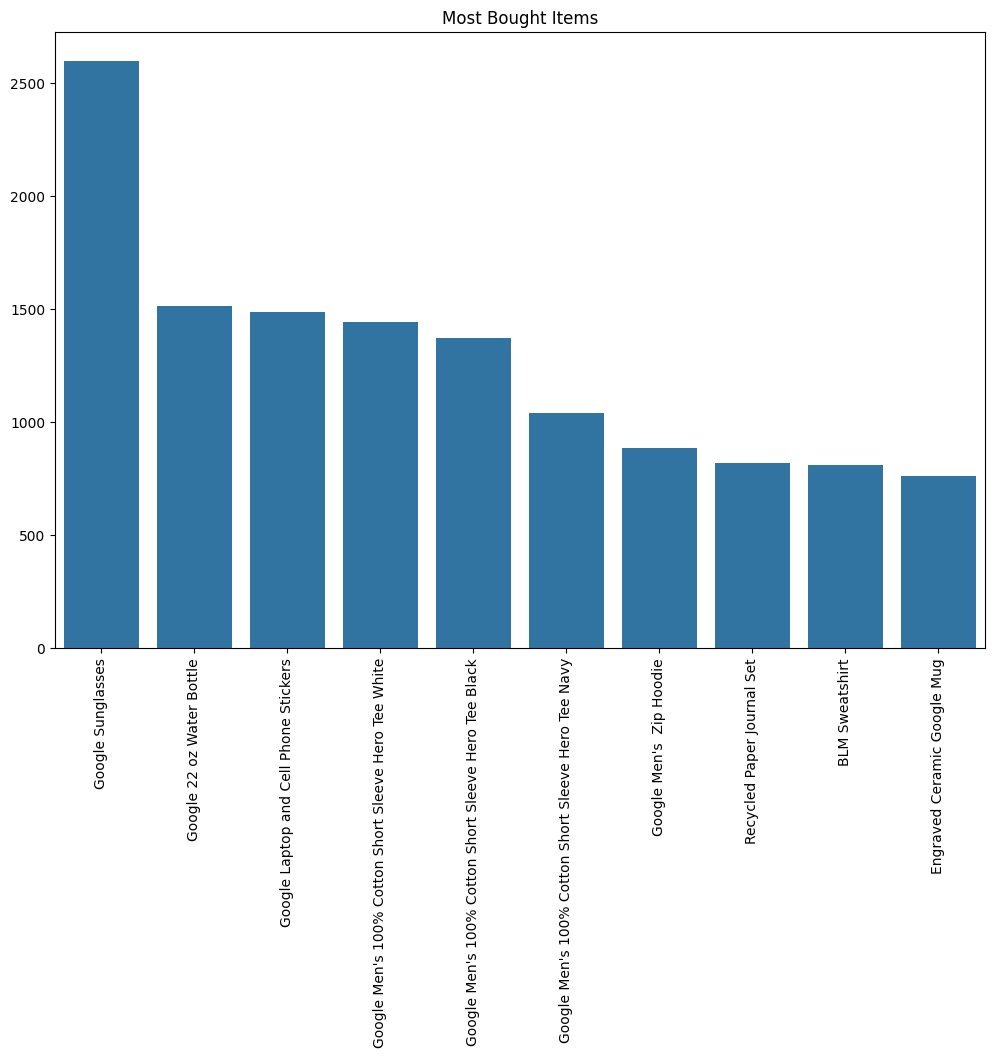

In [54]:
bar_plot(usa_bought_items,usa_bought_frequency,"Most Bought Items")

In [55]:
usa_views = grouped.filter(pl.col('country') == 'United States').row(0)[1]
usa_views

['Google Alpine Style Backpack',
 'YouTube Custom Decals',
 'YouTube RFID Journal',
 "Google Men's Short Sleeve Hero Tee Heather",
 'Leather and Metal Ballpoint Pen',
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
 'Android Lunch Kit',
 "YouTube Men's Short Sleeve Hero Tee White",
 'Google Insulated Stainless Steel Bottle',
 'Ballpoint LED Light Pen',
 "Google Women's Short Sleeve Hero Tee Sky Blue",
 'Android Lunch Kit',
 "Google Men's Watershed Full Zip Hoodie Grey",
 'Google High Capacity 10,400mAh Charger',
 'Engraved Ceramic Google Mug',
 "YouTube Men's 3/4 Sleeve Henley",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Red",
 "YouTube Men's Short Sleeve Hero Tee White",
 "Google Women's Vintage Hero Tee Lavender",
 "Google Men's Short Sleeve Hero Tee Light Blue",
 'Google Tote Bag',
 'Google G Noise-reducing Bluetooth Headphones',
 'Metal Earbuds with Small Zipper Case',
 'Android 24 oz Contigo Bottle',
 "Google Men's 100% Cotton Short Sleeve Hero Tee White",
 '26 oz D

In [56]:
most_viewed_items = Counter(usa_views).most_common()
most_viewed_items = most_viewed_items[:10]
most_viewed_items

[("Google Men's 100% Cotton Short Sleeve Hero Tee White", 186525),
 ("Google Men's 100% Cotton Short Sleeve Hero Tee Black", 122026),
 ("Google Men's 100% Cotton Short Sleeve Hero Tee Navy", 118740),
 ('Electronics Accessory Pouch', 109818),
 ("Google Men's  Zip Hoodie", 102908),
 ("Google Men's Watershed Full Zip Hoodie Grey", 102308),
 ("YouTube Men's Short Sleeve Hero Tee Black", 102294),
 ('22 oz YouTube Bottle Infuser', 97956),
 ('Google Laptop and Cell Phone Stickers', 97424),
 ("YouTube Men's Short Sleeve Hero Tee Charcoal", 93780)]

In [57]:
# Adding frequency of 10 most add to cart items to list for plotting 
viewed_items_list = list_comprehension(most_viewed_items, "items")
viewed_items_list

["Google Men's 100% Cotton Short Sleeve Hero Tee White",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
 "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
 'Electronics Accessory Pouch',
 "Google Men's  Zip Hoodie",
 "Google Men's Watershed Full Zip Hoodie Grey",
 "YouTube Men's Short Sleeve Hero Tee Black",
 '22 oz YouTube Bottle Infuser',
 'Google Laptop and Cell Phone Stickers',
 "YouTube Men's Short Sleeve Hero Tee Charcoal"]

In [58]:
# Adding frequency of 10 most add to cart items to list for plotting 
viewed_frequency_list = list_comprehension(most_viewed_items, "frequency")
viewed_frequency_list

[186525, 122026, 118740, 109818, 102908, 102308, 102294, 97956, 97424, 93780]

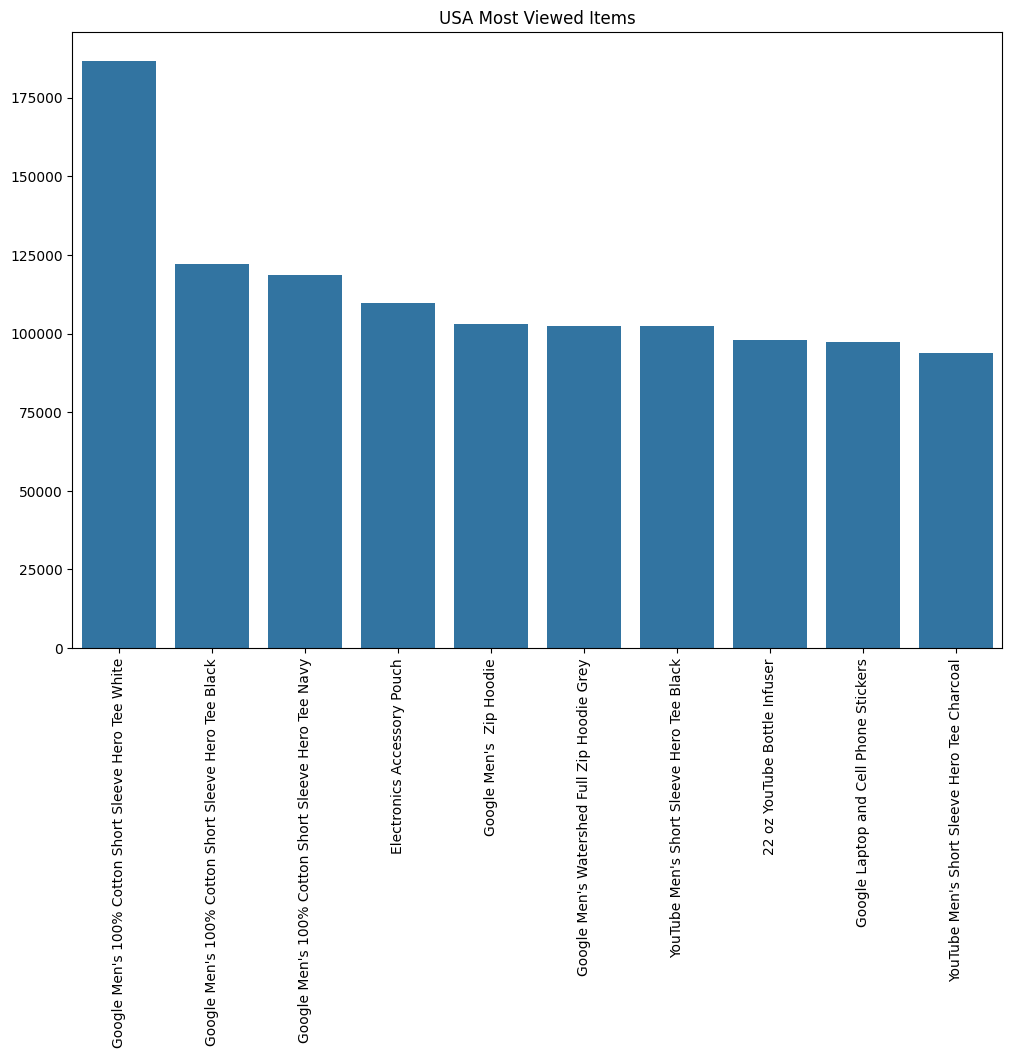

In [59]:
bar_plot(viewed_items_list,viewed_frequency_list,"USA Most Viewed Items")

In [60]:
source_purchases = usa_purchases.group_by(pl.col('source')).agg(pl.col('v2ProductName'))
source_purchases 

source,v2ProductName
str,list[str]
"""search.myway.com""","[""YouTube Custom Decals"", ""YouTube Men's Short Sleeve Hero Tee Black"", … ""YouTube Twill Cap""]"
"""yahoo""","[""Color Changing Grip Pen"", ""Sport Bag"", … ""Google Sunglasses""]"
"""groups.google.com""","[""YouTube Onesie Heather"", ""YouTube Onesie Heather"", … ""BLM Sweatshirt""]"
"""calendar.google.com""","[""YouTube Custom Decals"", ""22 oz Android Bottle"", … ""YouTube Custom Decals""]"
"""dealspotr.com""","[""Google Men's Bike Short Sleeve Tee Charcoal"", ""Android Men's Pep Rally Short Sleeve Tee Navy"", … ""Google Men's 100% Cotton Short Sleeve Hero Tee Red""]"
…,…
"""dfa""","[""7&quot; Dog Frisbee"", ""Electronics Accessory Pouch"", … ""Google Men's Short Sleeve Performance Badge Tee Navy""]"
"""plus.google.com""","[""Ballpoint Stick Pen 4 Pack"", ""Google Sunglasses"", … ""BLM Sweatshirt""]"
"""Partners""","[""Google Sunglasses"", ""Foam Can and Bottle Cooler"", … ""Google Sunglasses""]"


In [61]:
os_purchases = usa_purchases.group_by(pl.col('operatingSystem')).agg(pl.col('v2ProductName'))
os_purchases

operatingSystem,v2ProductName
str,list[str]
"""Chrome OS""","[""Google Men's Vintage Badge Tee Sage"", ""Google Men's Short Sleeve Performance Badge Tee Black"", … ""Google Womens 3/4 Sleeve Baseball Raglan Heather/Black""]"
"""Windows""","[""Google Men's Lightweight Microfleece Jacket Black"", ""Retractable Ballpoint Pen Red"", … ""Google Youth Girl Hoodie""]"
"""Windows Phone""","[""Maze Pen"", ""Recycled Mouse Pad"", … ""YouTube Custom Decals""]"
"""Linux""","[""Google Men's 100% Cotton Short Sleeve Hero Tee White"", ""Google Men's Short Sleeve Performance Badge Tee Charcoal"", … ""Google Men's Bike Short Sleeve Tee Charcoal""]"
"""iOS""","[""Electronics Accessory Pouch"", ""Google Sunglasses"", … ""Engraved Ceramic Google Mug""]"
"""Android""","[""Google Men's 100% Cotton Short Sleeve Hero Tee White"", ""Google Women's Short Sleeve Hero Tee Grey"", … ""Google Men's Vintage Badge Tee Sage""]"
"""Macintosh""","[""Google Doodle Decal"", ""Google Power Bank"", … ""YouTube Leatherette Notebook Combo""]"


In [62]:
browser_purchases = usa_purchases.group_by(pl.col('browser')).agg(pl.col('v2ProductName'))
browser_purchases

browser,v2ProductName
str,list[str]
"""Chrome""","[""Google Doodle Decal"", ""Google Men's Lightweight Microfleece Jacket Black"", … ""YouTube Leatherette Notebook Combo""]"
"""Amazon Silk""","[""YouTube Men's Vintage Henley"", ""YouTube Men's Vintage Henley"", … ""YouTube Men's Vintage Henley""]"
"""Safari (in-app)""","[""Waze Mood Original Window Decal"", ""Waze Mood Original Window Decal"", … ""Waze Dress Socks""]"
"""Android Webview""","[""Waze Men's Short Sleeve Tee"", ""YouTube Sticker Sheet"", … ""Waze Mood Original Window Decal""]"
"""Safari""","[""22 oz Android Bottle"", ""Badge Holder"", … ""Four Color Retractable Pen""]"
"""Opera""","[""Google 17oz Stainless Steel Sport Bottle"", ""Google Men's 100% Cotton Short Sleeve Hero Tee Black"", … ""Foam Can and Bottle Cooler""]"
"""Internet Explorer""","[""Google Rucksack"", ""Google Women's Fleece Hoodie"", … ""24 oz YouTube Sergeant Stripe Bottle""]"
"""Firefox""","[""7&quot; Dog Frisbee"", ""Google Men's Vintage Badge Tee Sage"", … ""Badge Holder""]"
"""Edge""","[""YouTube Custom Decals"", ""Google Men's 100% Cotton Short Sleeve Hero Tee Red"", … ""Google Laptop and Cell Phone Stickers""]"


In [63]:
views_by_source = df.group_by(pl.col('source')).agg(pl.col('v2ProductName'))
views_by_source

source,v2ProductName
str,list[str]
"""google.com.hk""","[""Google Alpine Style Backpack"", ""Gift Card - $25.00"", … ""Rubber Grip Ballpoint Pen 4 Pack""]"
"""kidrex.org""","[""22 oz YouTube Bottle Infuser"", ""You Tube Toddler Short Sleeve Tee Red"", … ""YouTube Men's Short Sleeve Hero Tee Black""]"
"""prod.facebook.com""","[""Google Women's Short Sleeve Hero Tee Black"", ""Google Women's Short Sleeve Hero Tee White"", … ""Google Men's Pullover Hoodie""]"
"""computerworld.com""","[""Foam Can and Bottle Cooler"", ""Android Lunch Kit"", … ""Google Car Clip Phone Holder""]"
"""google.com.au""","[""Google Stylus Pen w/ LED Light"", ""Windup Android"", … ""Badge Holder""]"
…,…
"""new.vk.com""","[""Android 24 oz Contigo Bottle"", ""20 oz Stainless Steel Insulated Tumbler"", … ""Bottle Opener Clip""]"
"""dealspotr.com""","[""Google Insulated Stainless Steel Bottle"", ""Google Tube Power Bank"", … ""Google Men's 100% Cotton Short Sleeve Hero Tee White""]"
"""mysearch.com""","[""YouTube Wool Heather Cap Heather/Black"", ""Google Blackout Cap"", … ""Google Men's Long Sleeve Pullover Crew Tee Heather""]"


In [64]:
df.select(pl.col('v2ProductCategory'))

v2ProductCategory
str
"""Home/Shop by Brand/YouTube/"""
"""Home/Bags/"""
"""Home/Shop by Brand/YouTube/"""
"""Home/Bags/"""
"""Home/Shop by Brand/YouTube/"""
…
"""Home/Apparel/Women's/Women's-T…"
"""Home/Shop by Brand/Google/"""
"""Home/Electronics/"""


In [65]:
df = df.with_columns(pl.when(pl.col('transactionId') != 'null').then(1).otherwise(0).alias("transactionId"))

In [66]:
user_profiles = df.group_by(pl.col('fullVisitorId')).agg(
    pl.col('country'), pl.col('browser'), pl.col('operatingSystem'), pl.col('source'),
    pl.col('transactionId'), pl.col('v2ProductCategory'), pl.col('v2ProductName')
)
user_profiles

fullVisitorId,country,browser,operatingSystem,source,transactionId,v2ProductCategory,v2ProductName
i64,list[str],list[str],list[str],list[str],list[i32],list[str],list[str]
8466129250600231768,"[""United States"", ""United States"", … ""United States""]","[""Chrome"", ""Chrome"", … ""Chrome""]","[""Chrome OS"", ""Chrome OS"", … ""Chrome OS""]","[""(direct)"", ""(direct)"", … ""(direct)""]","[0, 0, … 0]","[""Home/Office/"", ""Home/Office/Office Other/"", … ""Home/Accessories/Fun/""]","[""Google Stylus Pen w/ LED Light"", ""Badge Holder"", … ""Google Sunglasses""]"
3476822093030295406,"[""Japan"", ""Japan"", … ""Japan""]","[""Safari"", ""Safari"", … ""Safari""]","[""iOS"", ""iOS"", … ""iOS""]","[""(direct)"", ""(direct)"", … ""(direct)""]","[0, 0, … 0]","[""Home/Shop by Brand/"", ""Home/Accessories/"", … ""Home/Accessories/""]","[""Windup Android"", ""1 oz Hand Sanitizer"", … ""Switch Tone Color Crayon Pen""]"
7829730832997367583,"[""Morocco"", ""Morocco"", … ""Morocco""]","[""Chrome"", ""Chrome"", … ""Chrome""]","[""Windows"", ""Windows"", … ""Windows""]","[""google"", ""google"", … ""google""]","[0, 0, … 0]","[""Home/Bags/"", ""Home/Bags/"", … ""Home/Bags/""]","[""Google Canvas Tote Natural/Navy"", ""Suitcase Organizer Cubes"", … ""Google Alpine Style Backpack""]"
5635090698474758481,"[""Netherlands"", ""Netherlands"", … ""Netherlands""]","[""Chrome"", ""Chrome"", … ""Chrome""]","[""Android"", ""Android"", … ""Android""]","[""google"", ""google"", … ""google""]","[0, 0, … 0]","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Shop by Brand/YouTube/""]","[""YouTube Notebook and Pen Set"", ""24 oz YouTube Sergeant Stripe Bottle"", … ""24 oz YouTube Sergeant Stripe Bottle""]"
3481831216665854654,"[""India"", ""India"", … ""India""]","[""Safari"", ""Safari"", … ""Safari""]","[""Macintosh"", ""Macintosh"", … ""Macintosh""]","[""youtube.com"", ""youtube.com"", … ""youtube.com""]","[0, 0, … 0]","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Shop by Brand/YouTube/""]","[""YouTube Trucker Hat"", ""You Tube Toddler Short Sleeve Tee Red"", … ""YouTube Men's Short Sleeve Hero Tee Charcoal""]"
…,…,…,…,…,…,…,…
1110010437934963399,"[""United States"", ""United States"", … ""United States""]","[""Chrome"", ""Chrome"", … ""Chrome""]","[""Windows"", ""Windows"", … ""Windows""]","[""youtube.com"", ""youtube.com"", … ""youtube.com""]","[0, 0, … 0]","[""Home/Shop by Brand/YouTube/"", ""Home/Shop by Brand/YouTube/"", … ""Home/Shop by Brand/YouTube/""]","[""YouTube Notebook and Pen Set"", ""YouTube Luggage Tag"", … ""YouTube Wool Heather Cap Heather/Black""]"
7403088047146115446,"[""Canada"", ""Canada"", … ""Canada""]","[""Safari"", ""Safari"", … ""Safari""]","[""Macintosh"", ""Macintosh"", … ""Macintosh""]","[""google"", ""google"", … ""google""]","[0, 0, … 0]","[""Home/Bags/"", ""Home/Bags/"", … ""Home/Electronics/Flashlights/""]","[""Google Canvas Tote Natural/Navy"", ""Electronics Accessory Pouch"", … ""Basecamp Explorer Powerbank Flashlight""]"
7648000838574730689,"[""Canada"", ""Canada"", … ""Canada""]","[""Safari"", ""Safari"", … ""Safari""]","[""iOS"", ""iOS"", … ""iOS""]","[""(direct)"", ""(direct)"", … ""(direct)""]","[0, 0, … 0]","[""Home/Shop by Brand/Google/"", ""Home/Apparel/Men's/Men's-Outerwear/"", … ""Home/Shop by Brand/Google/""]","[""Google Men's 100% Cotton Short Sleeve Hero Tee White"", ""Google Men's Quilted Insulated Vest Black"", … ""Google Trucker Hat""]"
